In [28]:
suppressPackageStartupMessages({
  library(Seurat)
  library(dplyr)
  library(ggplot2)
  library(scCustomize)
  library(scater)
    library(RColorBrewer)
    library(data.table)
    library(stringr)
library(tibble)
    library(tidyr)
    library(harmony)
})

In [2]:
fig.size <- function (height, width, res=300) {
    options(repr.plot.height = height, repr.plot.width = width, resolution=res)
}

In [3]:
adr.obj = readRDS(glue::glue(
            '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis',
            '/results/seurat_2/heatmap_objects/mouse_obj.rds'
        )
)

In [4]:
org.obj = readRDS(
    glue::glue(
            '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis',
            '/results/seurat_2/organoid/combined_new_6_samples_annotated.rds'
        )
)

In [5]:
adr.list =  SplitObject(adr.obj, split.by = "orig.ident")

In [6]:
org.list = SplitObject(org.obj, split.by = "orig.ident")

In [7]:
homo.list = c(
    adr.list$homo1,
    adr.list$homo2,
    adr.list$homo3,
    org.list$no_6_PT,
    org.list$no_50_PT
)

In [10]:
names(homo.list) = c('homo1', 'homo2', 'homo3', 'no_6_PT', 'no_50_PT')

In [11]:
homo.list$homo1@meta.data$age = 41
homo.list$homo2@meta.data$age = 37
homo.list$homo3@meta.data$age = 40
homo.list$no_6_PT@meta.data$age = 40
homo.list$no_50_PT@meta.data$age = 40

In [12]:
homo.list$homo1@meta.data$sex = 'female'
homo.list$homo2@meta.data$sex = 'male'
homo.list$homo3@meta.data$sex = 'female'
homo.list$no_6_PT@meta.data$sex = 'female'
homo.list$no_50_PT@meta.data$sex = 'female'

In [15]:
homo.list = lapply(homo.list, function(x){ DefaultAssay(x) = "RNA" ; return(x)})

In [23]:
merged_seurat <- merge(x = homo.list[[1]],
		       y = homo.list[2:length(homo.list)],
		       merge.data = TRUE)


In [24]:


merged_seurat <- merged_seurat %>%
    NormalizeData() %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 5000) %>% 
    ScaleData() %>%
    SCTransform(vars.to.regress = c("percent.mt"))

Centering and scaling data matrix

Running SCTransform on assay: RNA

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 19294 by 41430

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 516 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 19294 genes

Computing corrected count matrix for 19294 genes

Calculating gene attributes

Wall clock passed: Time difference of 3.167178 mins

Determine variable features

Regressing out percent.mt

Centering data matrix

Place corrected count matrix in counts slot

Set default assay to SCT



In [30]:
merged_seurat <- RunPCA(merged_seurat, assay = "SCT", npcs = 50)

PC_ 1 
Positive:  MYCN, Tmsb4x, Cd74, Tyrobp, Srgn, Fcer1g, Cd52, Lyz2, Cyba, H2-Ab1 
	   H2-Aa, Fth1, H2-Eb1, Ifitm3, Il1b, H2-D1, Plac8, Cebpb, Eef1a1, Ftl1-ps1 
	   Lgals3, Coro1a, B2m, S100a11, Vim, Arpc1b, Igkc, Ctss, H2-K1, Hspa8 
Negative:  Rps8, Rpl13, Rpl41, Hist1h2ap, mt-Rnr2, mt-Atp6, Rpl32, Rps27a, Rps29, Rps26 
	   Rps28, Rpl36, mt-Co2, Rpl37, Rpsa, Rps20, Rps24, Rpl27a, Rps15a, Rpl37a 
	   mt-Co1, Rpl19, Gm10076, Rps21, Rpl23, Rps11, Rpl18, Rpl8, Rpl38, Rps13 
PC_ 2 
Positive:  MYCN, Ptma, H2afz, Stmn1, Gnas, Hsp90ab1, Ppia, Npm1, Tubb5, Eif5a 
	   Mif, Fabp5, Tuba1a, Ran, Hspa8, Meg3, Nnat, Dlk1, Hmgb2, Nefl 
	   Prdx2, Basp1, Ube2c, Nme1, Pebp1, Set, Hint1, Ybx1, Ppp1r14b, Sumo2 
Negative:  Cd74, Tmsb4x, Tyrobp, Lyz2, Fcer1g, H2-Ab1, H2-Eb1, H2-Aa, Cd52, Srgn 
	   Cyba, Ifitm3, Plac8, Il1b, Igkc, Lgals3, Crip1, Malat1, Ctss, H2-D1 
	   S100a6, Fth1, B2m, Cebpb, S100a11, Vim, Arpc1b, Ifi27l2a, Coro1a, H2-K1 
PC_ 3 
Positive:  Cd74, Igkc, H2-Eb1, H2-Ab1, H2-Aa, Cd79a, Igh

In [31]:
harmonized_seurat <- RunHarmony(merged_seurat, 
				group.by.vars = c("age", "sex"), 
				reduction = "pca", assay.use = "SCT", reduction.save = "harmony")

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



In [32]:
harmonized_seurat <- RunUMAP(harmonized_seurat, reduction = "harmony", assay = "SCT", dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:56:04 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:56:04 Read 41430 rows and found 40 numeric columns

11:56:04 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

11:56:04 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:56:08 Writing NN index file to 

In [33]:
harmonized_seurat <- FindNeighbors(object = harmonized_seurat, reduction = "harmony")
harmonized_seurat <- FindClusters(harmonized_seurat, resolution = c(0.2, 0.4, 0.6, 0.8, 1.0, 1.2))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1295860

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9601
Number of communities: 16
Elapsed time: 8 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1295860

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9399
Number of communities: 18
Elapsed time: 8 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1295860

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9217
Number of communities: 23
Elapsed time: 8 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1295860

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9094
Number of communities: 27
Elapsed time: 8 seconds
Modulari

In [34]:
harmonized_seurat@meta.data

orig.ident nCount_RNA nFeature_RNA percent.mt
homo1_tumor_AAACCCAAGAGGATCC-1 homo1       5383      2171          3.152207 
homo1_tumor_AAACCCAAGCATGATA-1 homo1       6190      2942          6.464957 
homo1_tumor_AAACCCAAGTTCCGGC-1 homo1       2727      1611          2.731411 
homo1_tumor_AAACCCACAGTCCGTG-1 homo1       6752      2948          4.288632 
homo1_tumor_AAACCCACATCAGCAT-1 homo1       8921      3615          4.265615 
homo1_tumor_AAACCCAGTTTCGATG-1 homo1      10225      3919          6.117974 
homo1_tumor_AAACCCATCCCTGGTT-1 homo1       4738      2507          7.594300 
homo1_tumor_AAACGAAAGGGAGGTG-1 homo1       6966      3128          3.491474 
homo1_tumor_AAACGAACAACGAGGT-1 homo1       8962      3496          4.518614 
homo1_tumor_AAACGAACAATCGCCG-1 homo1       8066      3325          3.243556 
homo1_tumor_AAACGAACACAAATAG-1 homo1       5544      2669          5.364400 
homo1_tumor_AAACGAACACTCTGCT-1 homo1        708       482          3.647416 
homo1_tumor_AAACGAACAGGCGATA-1 homo1       7732      3349          3.697884 
homo1_tumor_AAACGAAGTAGATCGG-1 homo1       6914      2989          3.225806 
homo1_tumor_AAACGAAGTATGAGAT-1 homo1       1941       849          2.822926 
homo1_tumor_AAACGAAGTGTTTACG-1 homo1       5355      2676          7.043651 
homo1_tumor_AAACGAATCAAGCTTG-1 homo1       6350      3046          3.150093 
homo1_tumor_AAACGCTAGGAGCAAA-1 homo1       5850      2837          3.759706 
homo1_tumor_AAACGCTCATGATAGA-1 homo1       6620      2913          3.343109 
homo1_tumor_AAACGCTGTATACAGA-1 homo1       4596      2561          7.025337 
homo1_tumor_AAACGCTGTGGACAGT-1 homo1       5687      2650          3.239260 
homo1_tumor_AAACGCTTCCATCGTC-1 homo1       5948      2726          5.357378 
homo1_tumor_AAACGCTTCGCGGTAC-1 homo1        850       556          1.469148 
homo1_tumor_AAAGAACAGAAGCTCG-1 homo1       6446      2891          3.656043 
homo1_tumor_AAAGAACAGCATCGAG-1 homo1        524       377          6.656347 
homo1_tumor_AAAGAACAGGACAGCT-1 homo1       7394      3130          4.144044 
homo1_tumor_AAAGAACCAGGCTTGC-1 homo1       4314      2359          2.778279 
homo1_tumor_AAAGAACGTCACCGCA-1 homo1       6227      2876          5.731857 
homo1_tumor_AAAGAACGTCACTCAA-1 homo1       7598      3290          5.132450 
homo1_tumor_AAAGAACGTCTGCCTT-1 homo1       2538      1649         14.772385 
⋮                              ⋮          ⋮          ⋮            ⋮         
TTTGATCTCGAGGCAA-1_6           no_50_PT    6532      2445         4.516228  
TTTGATCTCGGTCGGT-1_6           no_50_PT    8258      2779         2.857835  
TTTGATCTCTACTCAT-1_6           no_50_PT     696       465         3.304598  
TTTGATCTCTCTCAAT-1_6           no_50_PT    7105      2904         4.278677  
TTTGATCTCTCTTCAA-1_6           no_50_PT     752       462         4.388298  
TTTGGAGCACGCAAAG-1_6           no_50_PT    7971      2789         6.122193  
TTTGGAGGTGATTCTG-1_6           no_50_PT   11465      3594         2.939381  
TTTGGAGGTTGTTTGG-1_6           no_50_PT    6368      2443         2.591080  
TTTGGAGTCGAAGTGG-1_6           no_50_PT    6721      2404         3.511382  
TTTGGTTAGCGGGTAT-1_6           no_50_PT    9050      3050         3.480663  
TTTGGTTAGTGCGCTC-1_6           no_50_PT    2138      1106         6.782039  
TTTGGTTCAACGATTC-1_6           no_50_PT    8865      3090         3.395375  
TTTGGTTCAATGTGGG-1_6           no_50_PT    6835      2641         4.345282  
TTTGGTTCAATTCTCT-1_6           no_50_PT     965       562         2.590674  
TTTGGTTCACAATGCT-1_6           no_50_PT    9905      3376         3.705199  
TTTGGTTCAGTACTAC-1_6           no_50_PT   10313      3672         2.889557  
TTTGGTTCATCGCTGG-1_6           no_50_PT    9814      3410         3.005910  
TTTGGTTGTTCCTAAG-1_6           no_50_PT    7939      2971         4.333039  
TTTGGTTGTTGTGGCC-1_6           no_50_PT    8095      3080         3.150093  
TTTGGTTTCCCGATCT-1_6           no_50_PT   16141      4557         4.181897  
TTTGGTTTCGCCTTGT-1_6       

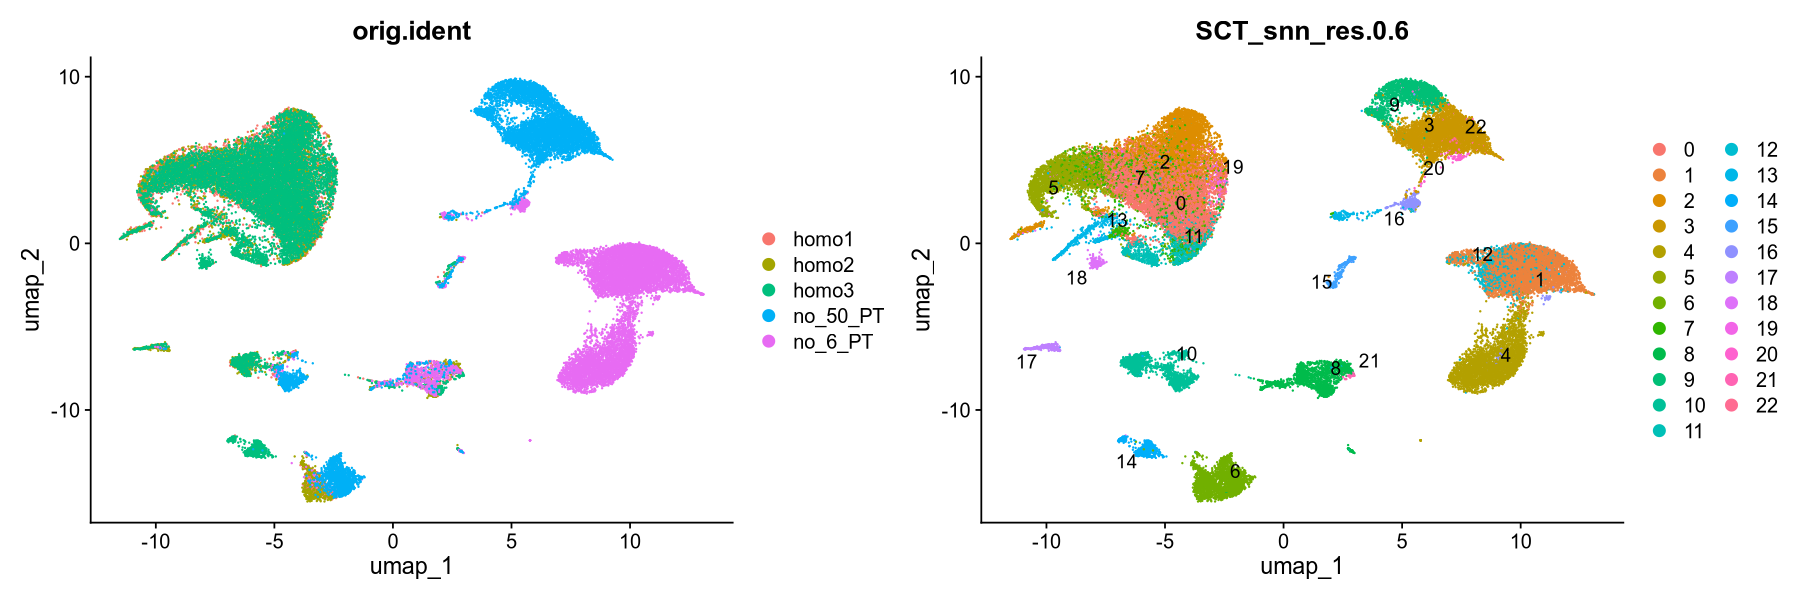

In [36]:
fig.size(5,15)
p1 <- DimPlot(harmonized_seurat, reduction = "umap", group.by = "orig.ident")
p2 <- DimPlot(harmonized_seurat, reduction = "umap", group.by ='SCT_snn_res.0.6', label = TRUE,
    repel = TRUE)
p1 + p2

In [88]:
?RunHarmony

RunHarmony               package:harmony               R Documentation

_G_e_n_e_r_i_c _f_u_n_c_t_i_o_n _t_h_a_t _r_u_n_s _t_h_e _h_a_r_m_o_n_y _a_l_g_o_r_i_t_h_m _o_n _s_i_n_g_l_e-_c_e_l_l
_g_e_n_o_m_i_c_s _c_e_l_l _e_m_b_e_d_d_i_n_g_s.

_D_e_s_c_r_i_p_t_i_o_n:

     RunHarmony is generic function that runs the main Harmony
     algorithm. If working with single cell R objects, please refer to
     the documentation of the appropriate generic API:
     (‘RunHarmony.Seurat()’ or ‘RunHarmony.SingleCellExperiment()’). If
     users work with other forms of cell embeddings, the can pass them
     directly to harmony using ‘RunHarmony.default()’ API. All the
     function arguments listed here are common in all RunHarmony
     interfaces.

_U_s_a_g_e:

     RunHarmony(...)
     
_A_r_g_u_m_e_n_t_s:

     ...: Arguments passed on to ‘RunHarmony.default’

          ‘theta’ Diversity clustering penalty parameter. Specify for
              each variable in vars_use Default theta=2. theta=0 does
              not encourage any diversity. Larger values of theta
              result in more diverse clusters.

          ‘sigma’ Width of soft kmeans clusters. Default sigma=0.1.
              Sigma scales the distance from a cell to cluster
              centroids. Larger values of sigma result in cells
              assigned to more clusters. Smaller values of sigma make
              soft kmeans cluster approach hard clustering.

          ‘lambda’ Ridge regression penalty. Default lambda=1. Bigger
              values protect against over correction. If several
              covariates are specified, then lambda can also be a
              vector which needs to be equal length with the number of
              variables to be corrected. In this scenario, each
              covariate level group will be assigned the scalars
              specified by the user. If set to NULL, harmony will start
              lambda estimation mode to determine lambdas automatically
              and try to minimize overcorrection (Use with caution
              still in beta testing).

          ‘nclust’ Number of clusters in model. nclust=1 equivalent to
              simple linear regression.

          ‘max_iter’ Maximum number of rounds to run Harmony. One round
              of Harmony involves one clustering and one correction
              step.

          ‘early_stop’ Enable early stopping for harmony. The
              harmonization process will stop when the change of
              objective function between corrections drops below 1e-4

          ‘ncores’ Number of processors to be used for math operations
              when optimized BLAS is available. If BLAS is not
              supporting multithreaded then this option has no effect.
              By default, ncore=1 which runs as a single-threaded
              process. Although Harmony supports multiple cores, it is
              not optimized for multithreading. Increase this number
              for large datasets iff single-core performance is not
              adequate.

          ‘plot_convergence’ Whether to print the convergence plot of
              the clustering objective function. TRUE to plot, FALSE to
              suppress. This can be useful for debugging.

          ‘verbose’ Whether to print progress messages. TRUE to print,
              FALSE to suppress.

          ‘.options’ Advanced parameters of RunHarmony. This must be
              the result from a call to `harmony_options`. See
              ?`harmony_options` for more details.

_V_a_l_u_e:

     If used with single-cell objects, it will return the updated
     single-sell object. For standalone operation, it returns the
     corrected cell embeddings or the R6 harmony object (see
     ‘RunHarmony.default()’).

_S_e_e _A_l_s_o:

     Other RunHarmony: ‘RunHarmony.Seurat()’,
     ‘RunHarmony.SingleCellE

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



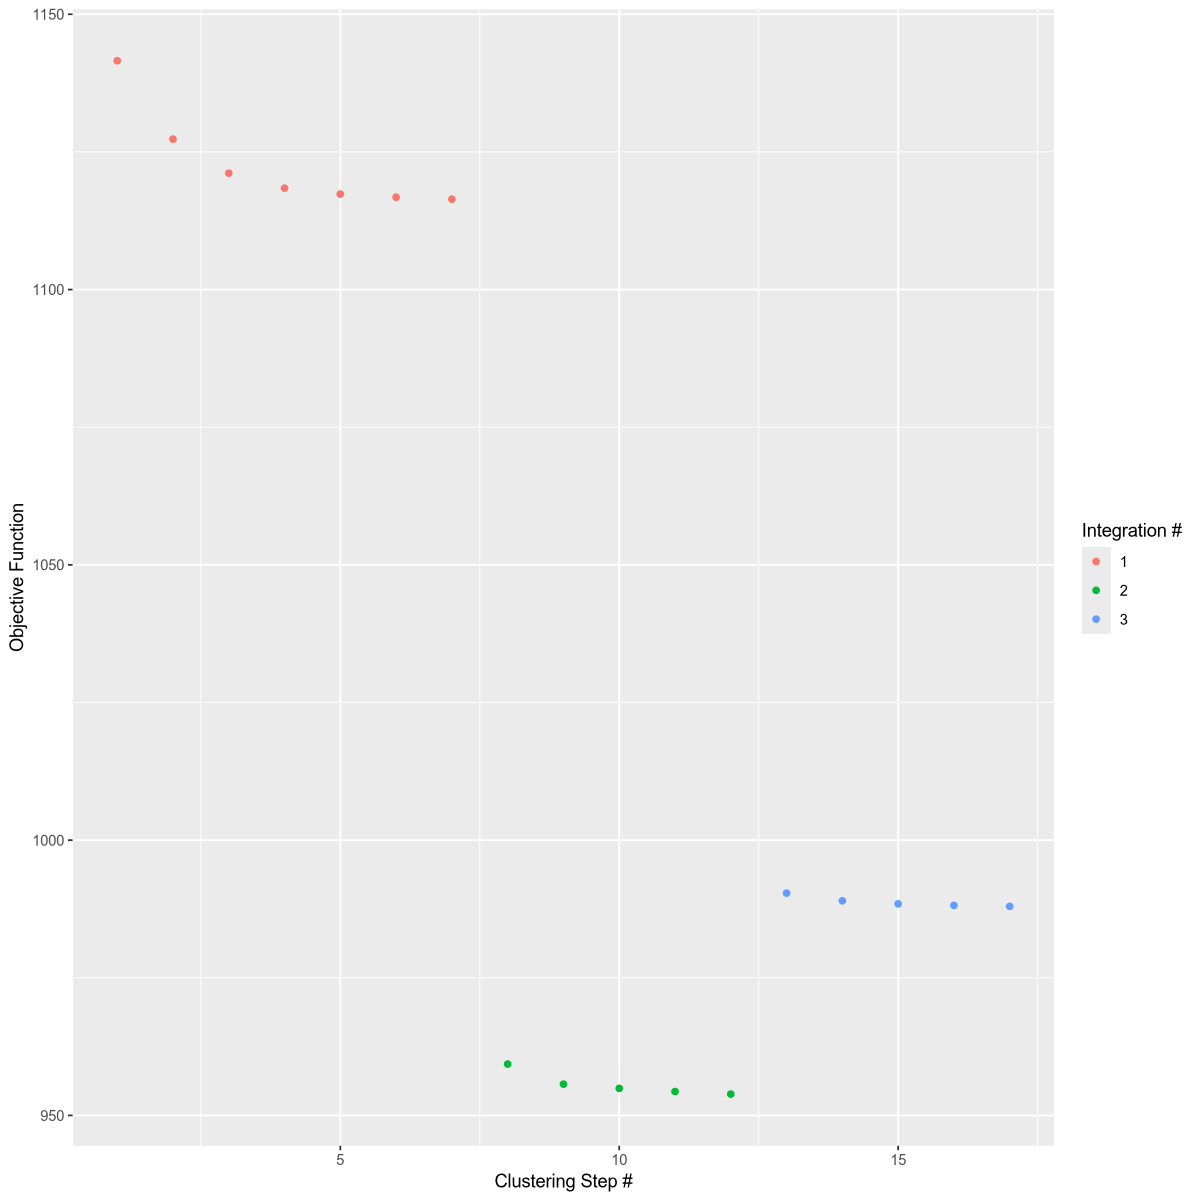

In [91]:
harmonized_seurat_2 = RunHarmony(
    merged_seurat, 
    c("orig.ident","age", "sex"),
    theta = c(2,2,1),
    plot_convergence = TRUE,
    nclust = 30,
    max.iter.cluster = 100
)



In [92]:
harmonized_seurat_2 <- RunUMAP(harmonized_seurat_2, reduction = "harmony", assay = "SCT", dims = 1:40)

12:34:39 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:34:39 Read 41430 rows and found 40 numeric columns

12:34:39 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:34:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:34:43 Writing NN index file to temp file /tmp/RtmpiDfedc/fileb518947ad550f

12:34:43 Searching Annoy index using 1 thread, search_k = 3000

12:34:54 Annoy recall = 100%

12:34:55 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:34:57 Initializing from normalized Laplacian +

In [93]:
harmonized_seurat_2 <- FindNeighbors(object = harmonized_seurat_2, reduction = "harmony")
harmonized_seurat_2 <- FindClusters(harmonized_seurat_2, resolution = c(0.2, 0.4, 0.6, 0.8, 1.0, 1.2))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1294421

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9507
Number of communities: 13
Elapsed time: 8 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1294421

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9277
Number of communities: 17
Elapsed time: 9 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1294421

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9098
Number of communities: 18
Elapsed time: 7 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1294421

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8944
Number of communities: 21
Elapsed time: 7 seconds
Modulari

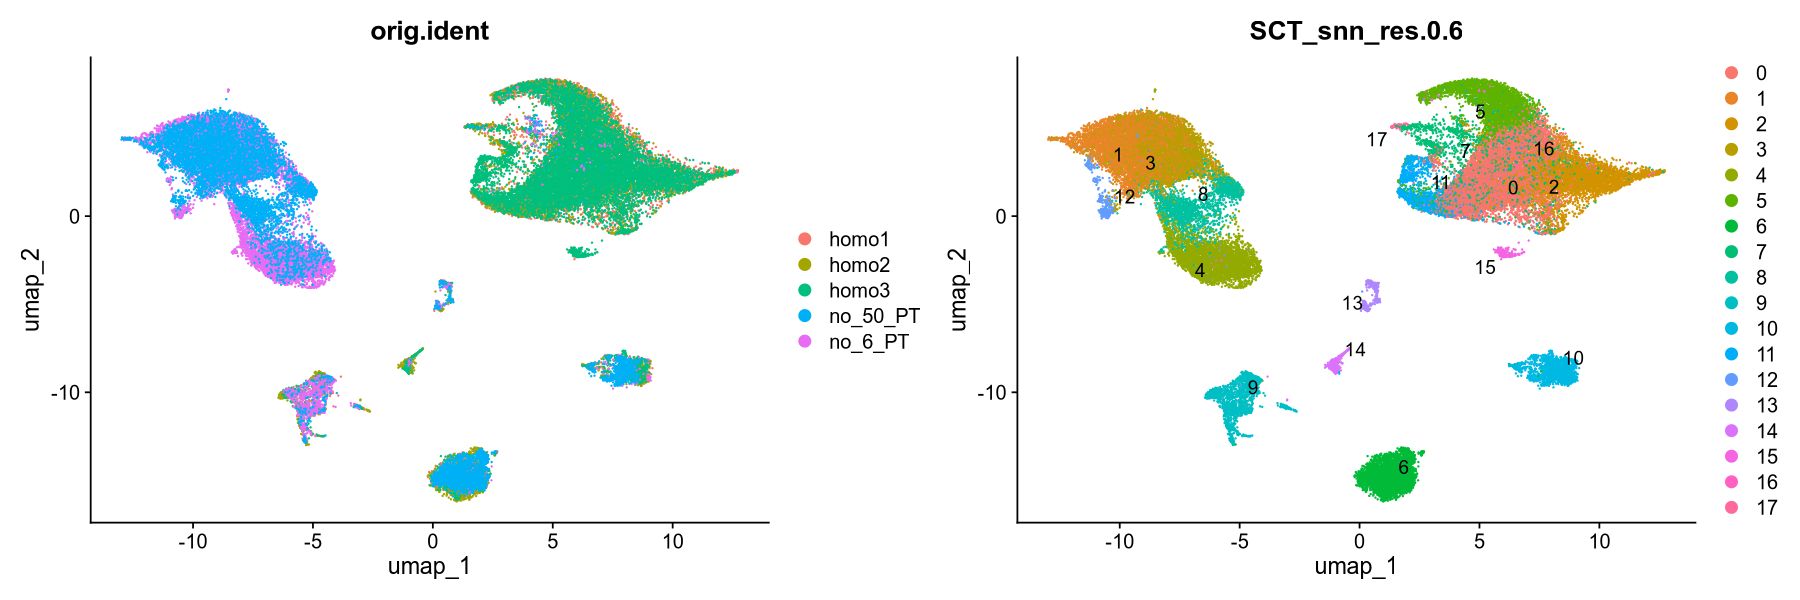

In [94]:
fig.size(5,15)
p1 <- DimPlot(harmonized_seurat_2, reduction = "umap", group.by = "orig.ident")
p2 <- DimPlot(harmonized_seurat_2, reduction = "umap", group.by ='SCT_snn_res.0.6', label = TRUE,
    repel = TRUE)
p1 + p2

In [41]:
harmonized_seurat_3 <- RunHarmony(merged_seurat, 
				group.by.vars = c("orig.ident"), 
				reduction = "pca", assay.use = "SCT", reduction.save = "harmony")

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



In [42]:
harmonized_seurat_3 <- RunUMAP(harmonized_seurat_3, reduction = "harmony", assay = "SCT", dims = 1:40)

12:05:19 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:05:19 Read 41430 rows and found 40 numeric columns

12:05:19 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:05:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:05:22 Writing NN index file to temp file /tmp/RtmpiDfedc/fileb518938a36d8e

12:05:22 Searching Annoy index using 1 thread, search_k = 3000

12:05:34 Annoy recall = 100%

12:05:34 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:05:36 Initializing from normalized Laplacian +

In [43]:
harmonized_seurat_3 <- FindNeighbors(object = harmonized_seurat_3, reduction = "harmony")
harmonized_seurat_3 <- FindClusters(harmonized_seurat_3, resolution = c(0.2, 0.4, 0.6, 0.8, 1.0, 1.2))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1297104

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9517
Number of communities: 13
Elapsed time: 8 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1297104

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9269
Number of communities: 18
Elapsed time: 9 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1297104

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9093
Number of communities: 20
Elapsed time: 7 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1297104

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8940
Number of communities: 24
Elapsed time: 7 seconds
Modulari

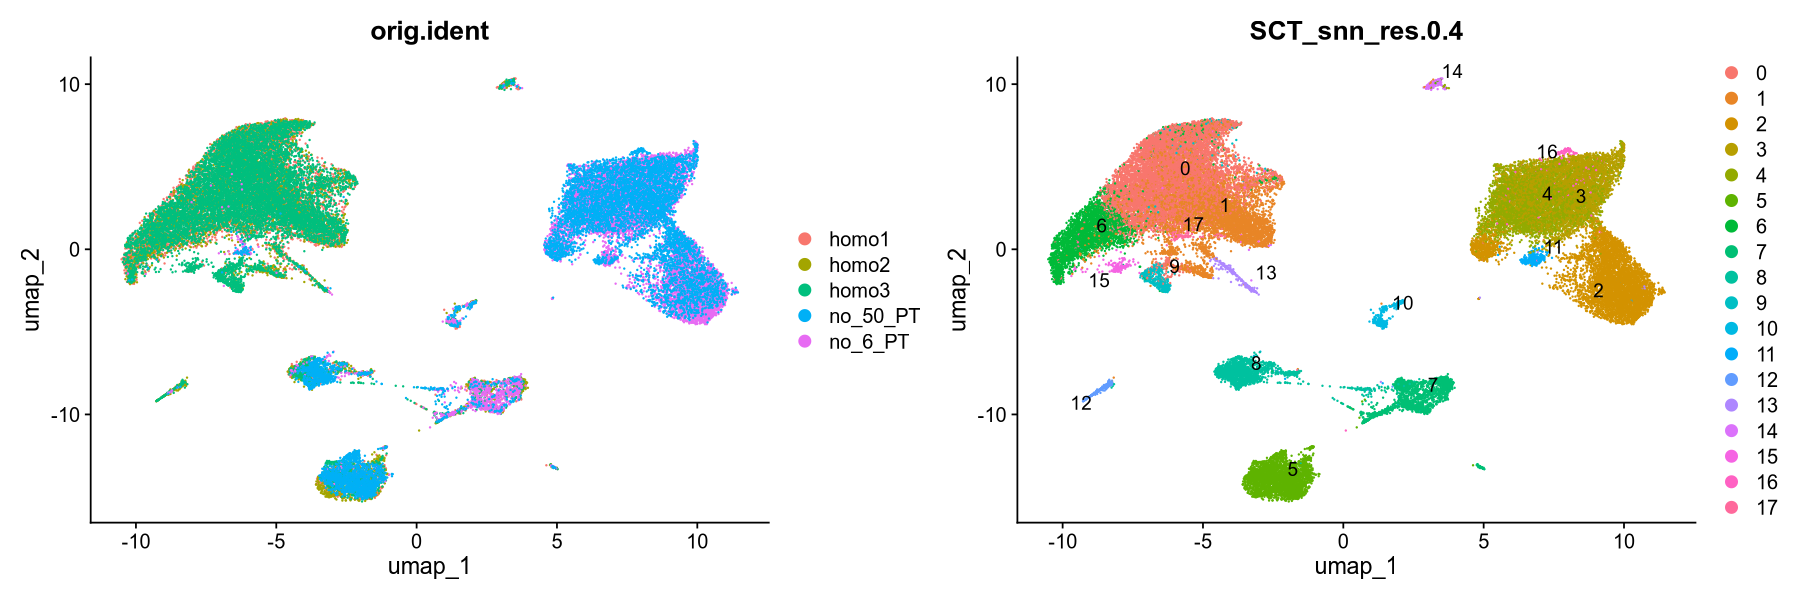

In [45]:
fig.size(5,15)
p1 <- DimPlot(harmonized_seurat_3, reduction = "umap", group.by = "orig.ident")
p2 <- DimPlot(harmonized_seurat_3, reduction = "umap", group.by ='SCT_snn_res.0.4', label = TRUE,
    repel = TRUE)
p1 + p2

In [50]:
annotations.df = read.csv('homo_annot.csv', row.names=1)

In [54]:
harmonized_seurat_3@meta.data$annot.new = annotations.df[rownames(harmonized_seurat_3@meta.data) ,'annot']

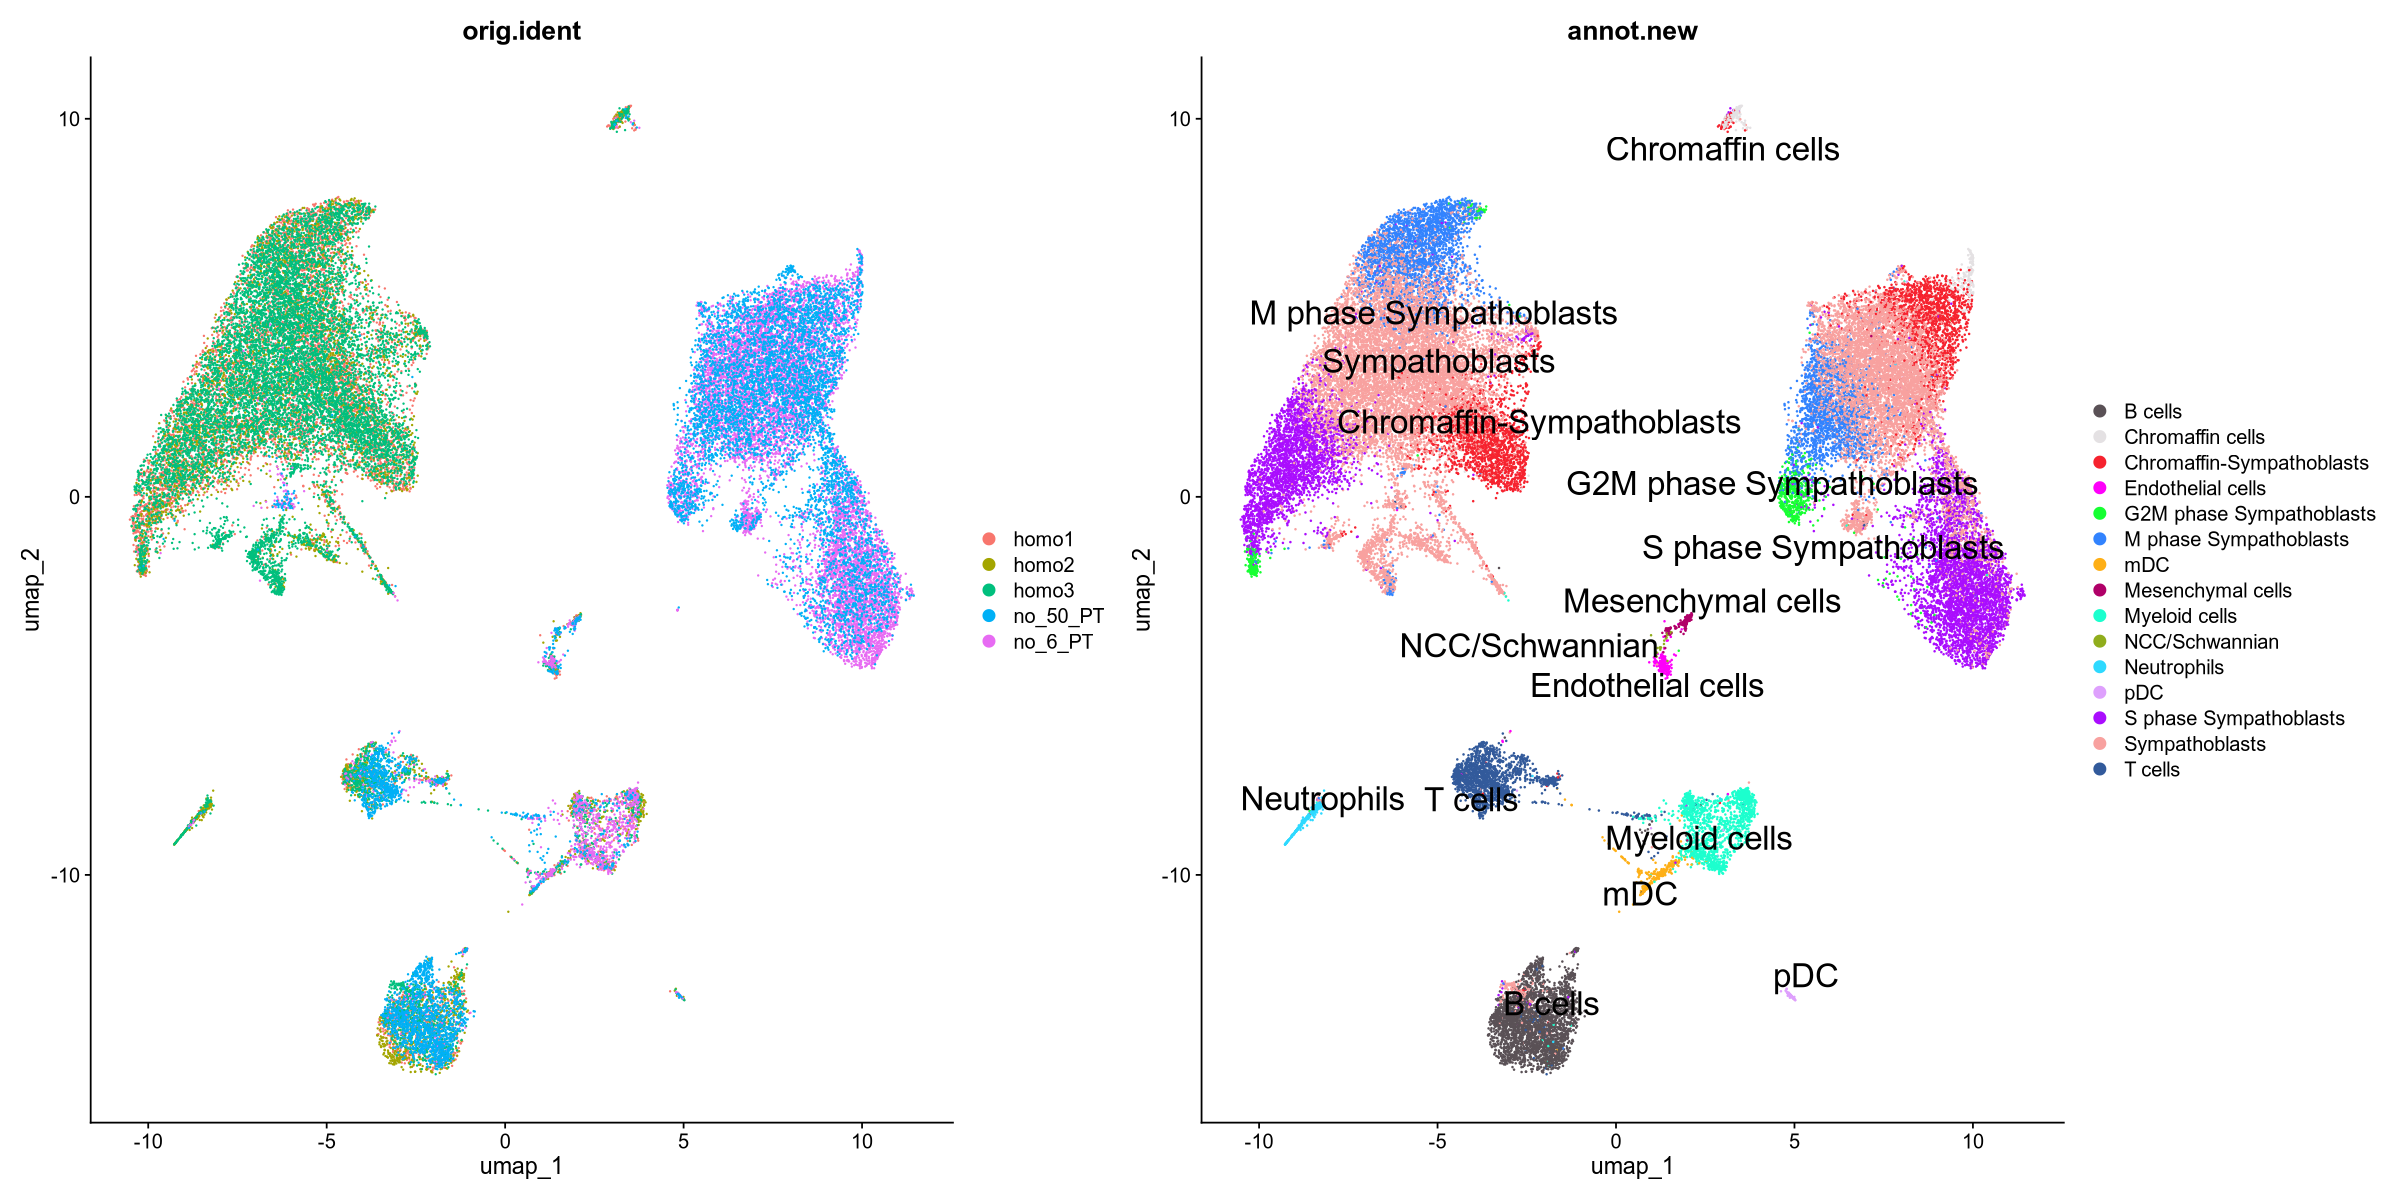

In [59]:
fig.size(10,20)
p1 <- DimPlot(harmonized_seurat_3, reduction = "umap", group.by = "orig.ident")
p2 <- scCustomize::DimPlot_scCustom(harmonized_seurat_3, reduction = "umap", group.by ='annot.new', label = TRUE,label.size = 7,
    repel = TRUE)
p1 + p2

In [ ]:
annot = annotations.df$Annotation
immune.combined@meta.data$annot = annot[ immune.combined$seurat_clusters ]
Idents(immune.combined) = "annot"

Transposing data matrix

Initializing state using k-means centroids initialization

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 2071500)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



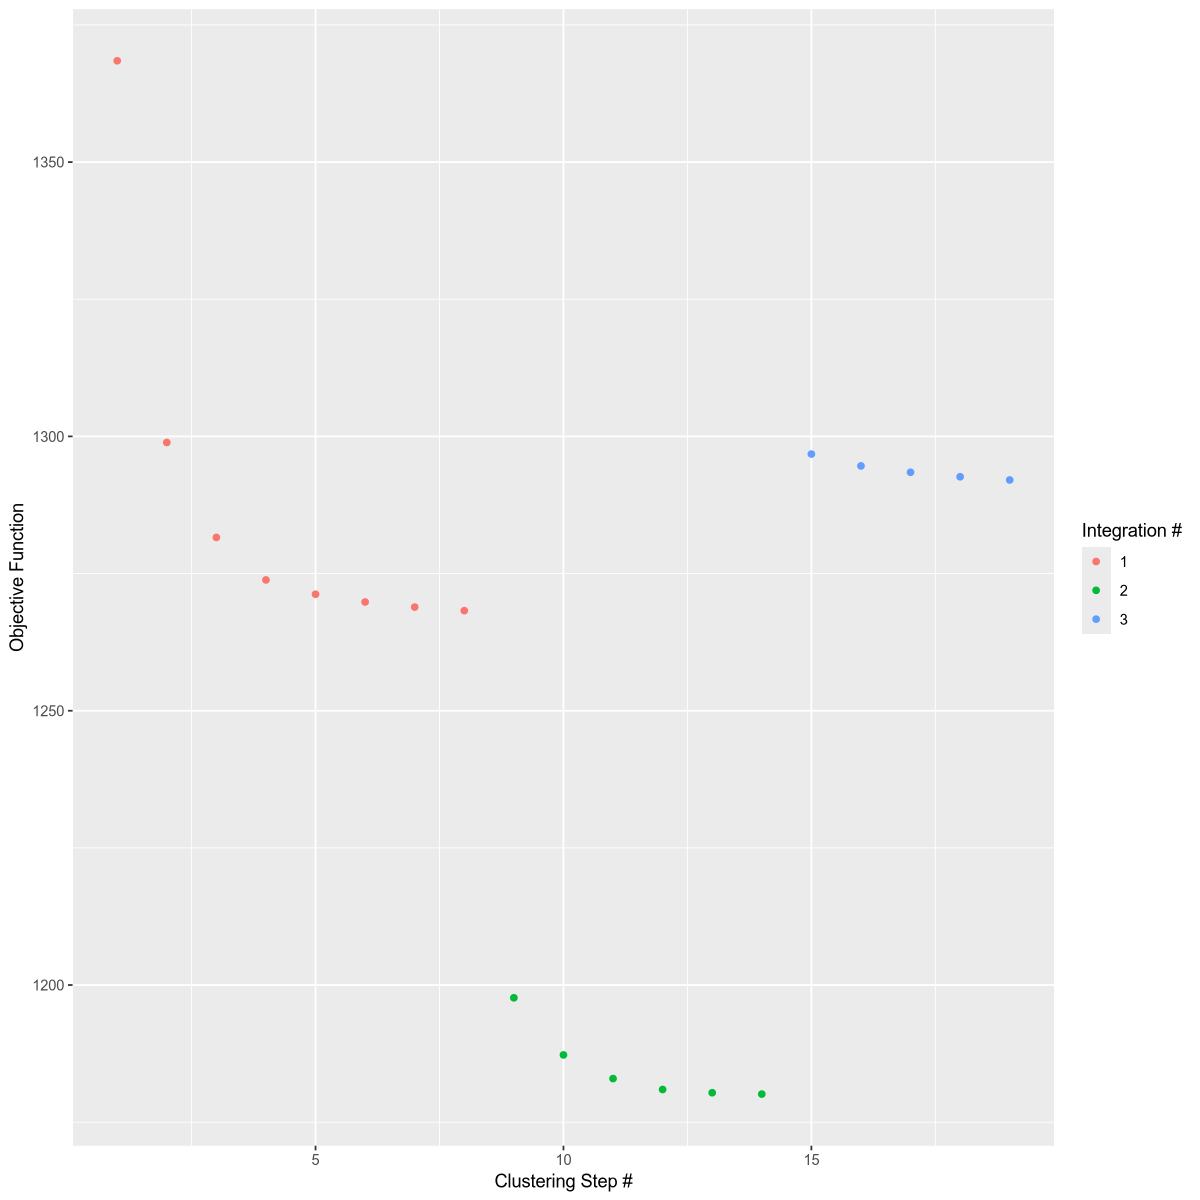

In [105]:
batches_harmony = RunHarmony(
    merged_seurat, 
    "orig.ident",
    theta = 5,
    plot_convergence = TRUE,
    nclust = 30,
    max.iter.cluster = 100
)

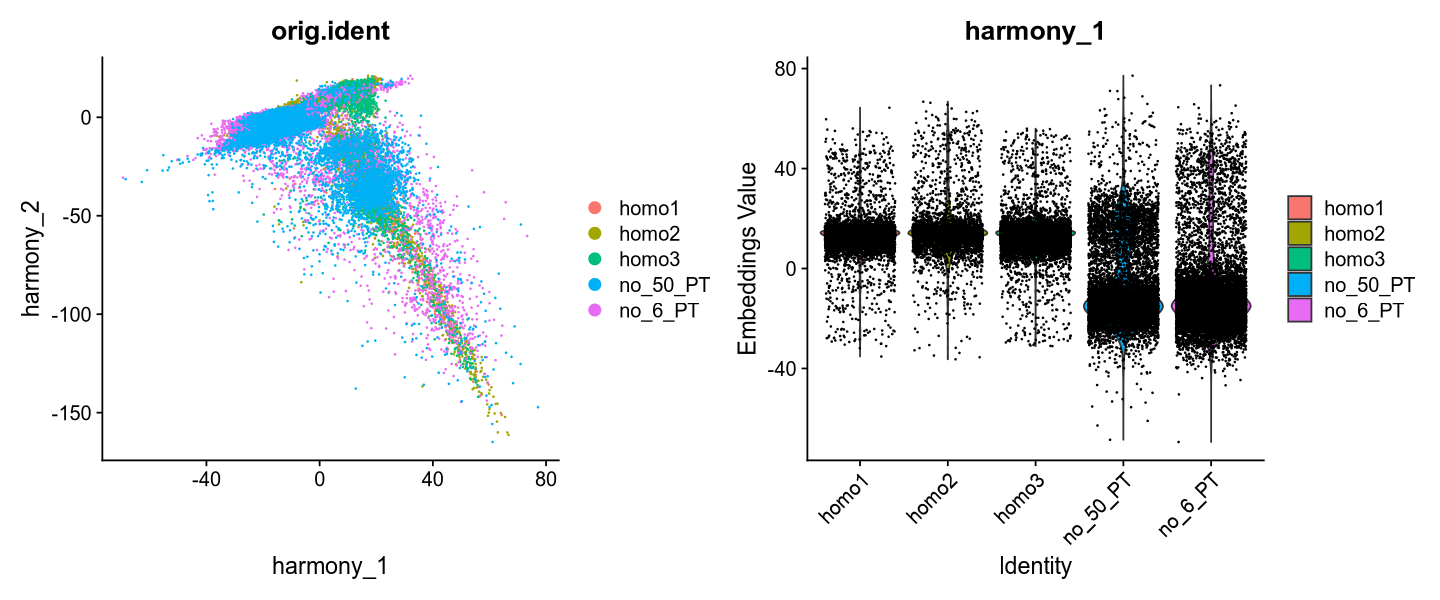

In [106]:

options(repr.plot.height = 5, repr.plot.width = 12)
p1 <- DimPlot(object = batches_harmony, reduction = "harmony", pt.size = .1, group.by = "orig.ident")
p2 <- VlnPlot(object = batches_harmony, features = "harmony_1", group.by = "orig.ident", pt.size = .1)
p1 + p2

In [107]:

batches_harmony <- batches_harmony %>% 
    RunUMAP(reduction = "harmony", dims = 1:30) %>% 
    FindNeighbors(reduction = "harmony", dims = 1:30) %>% 
    FindClusters(resolution = 0.5) %>% 
    identity()

12:41:08 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:41:08 Read 41430 rows and found 30 numeric columns

12:41:08 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:41:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:41:11 Writing NN index file to temp file /tmp/RtmpiDfedc/fileb5189786bde03

12:41:12 Searching Annoy index using 1 thread, search_k = 3000

12:41:23 Annoy recall = 100%

12:41:24 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:41:25 Initializing from normalized Laplacian +

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41430
Number of edges: 1347162

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9092
Number of communities: 20
Elapsed time: 10 seconds


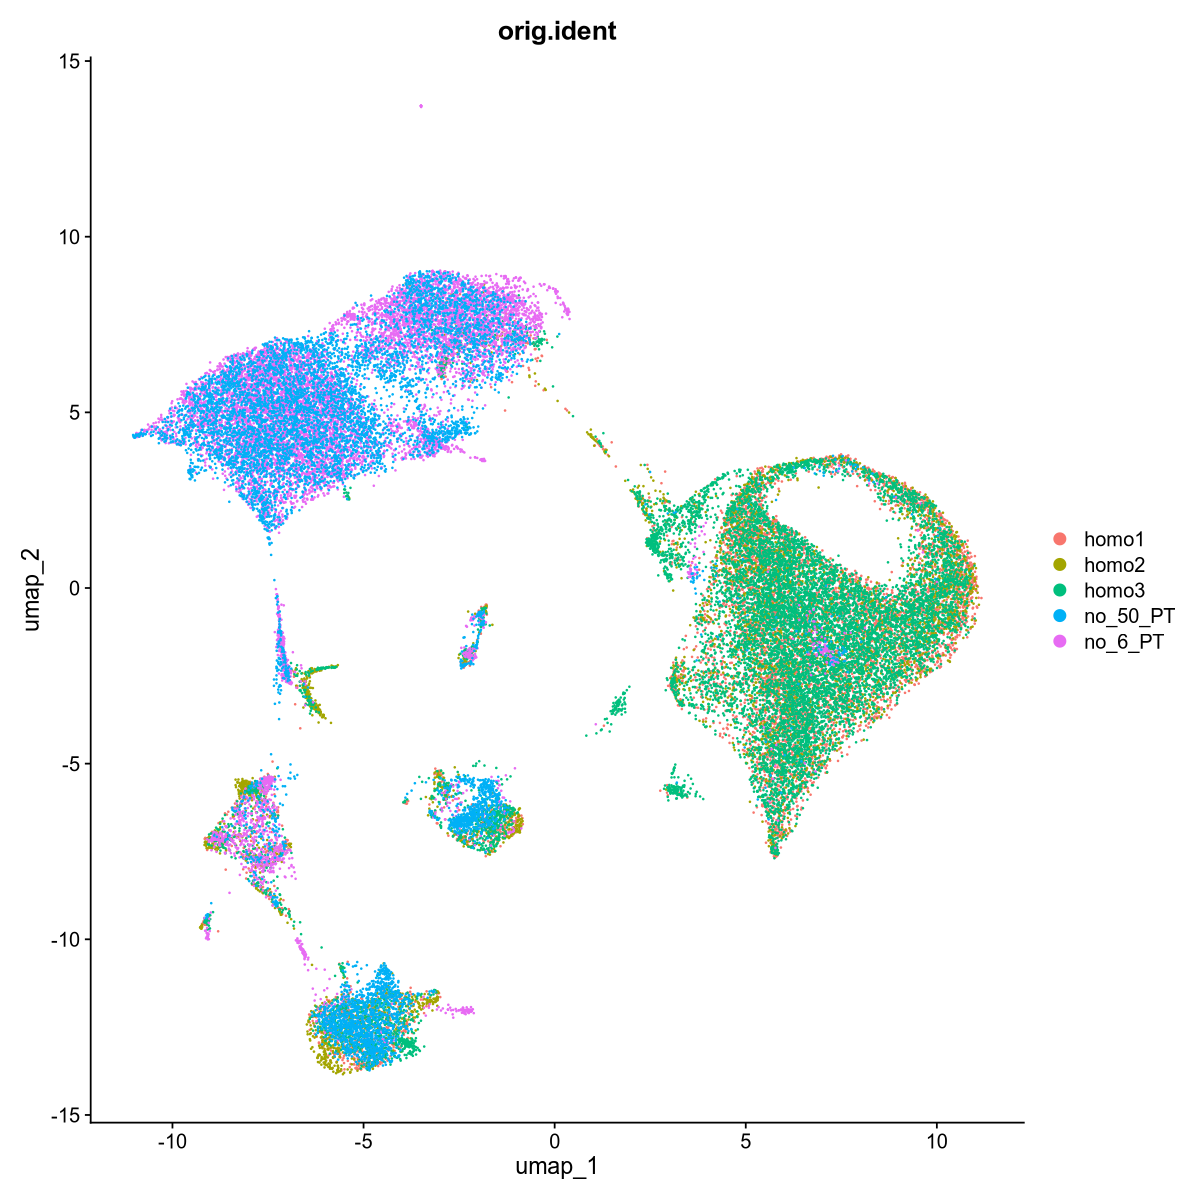

In [108]:
fig.size(10,10)
DimPlot(batches_harmony, reduction = "umap", 
        group.by = "orig.ident", pt.size = .1)

In [67]:
cc.genes.mm = readRDS('~/cc.genes.mm.rds')

In [68]:
s.genes = cc.genes.mm$s.genes
g2m.genes = cc.genes.mm$g2m.genes

In [69]:
batches_harmony <- CellCycleScoring(batches_harmony, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)

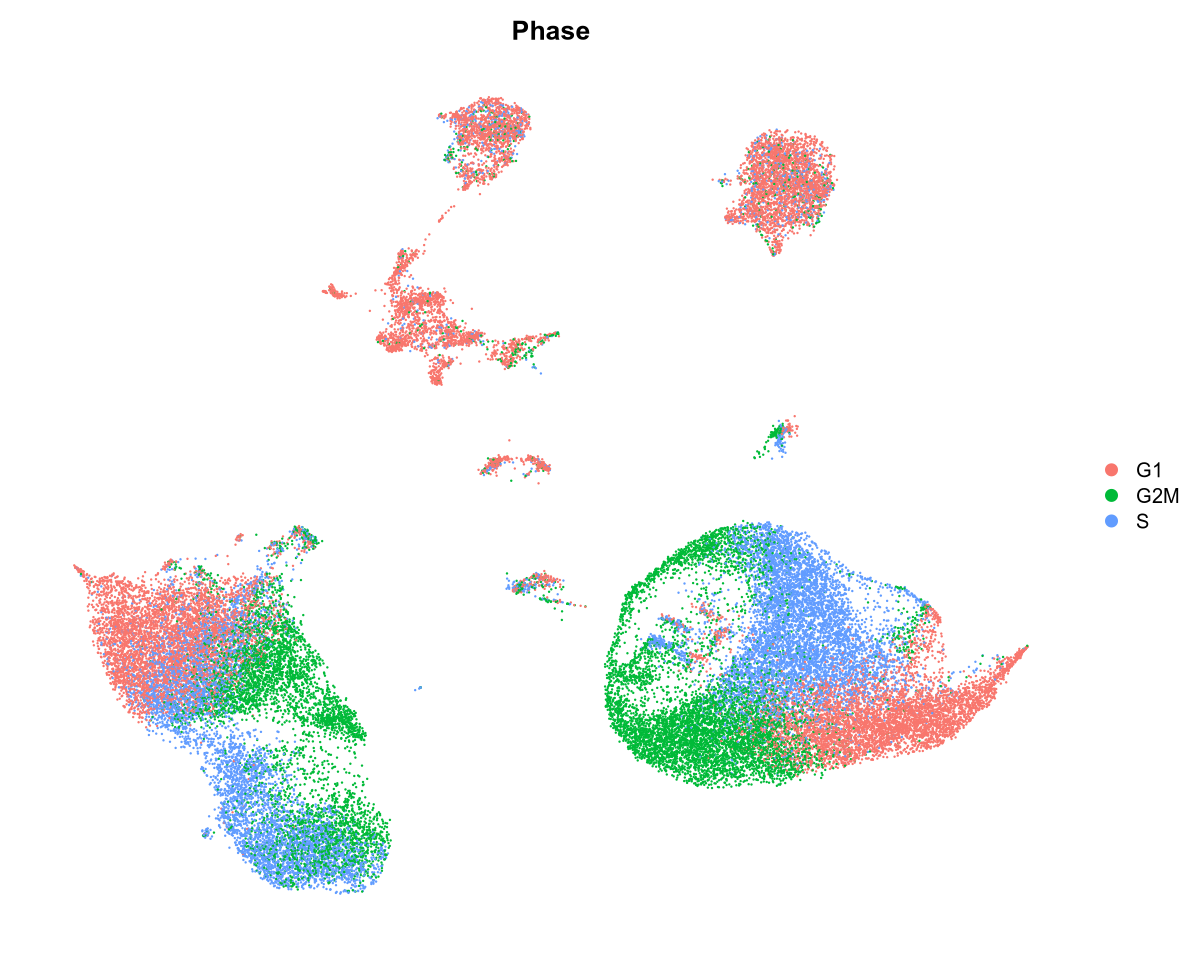

In [70]:
fig.size(8,10)
p1 = DimPlot(batches_harmony, group.by = "Phase") + NoAxes()
p1

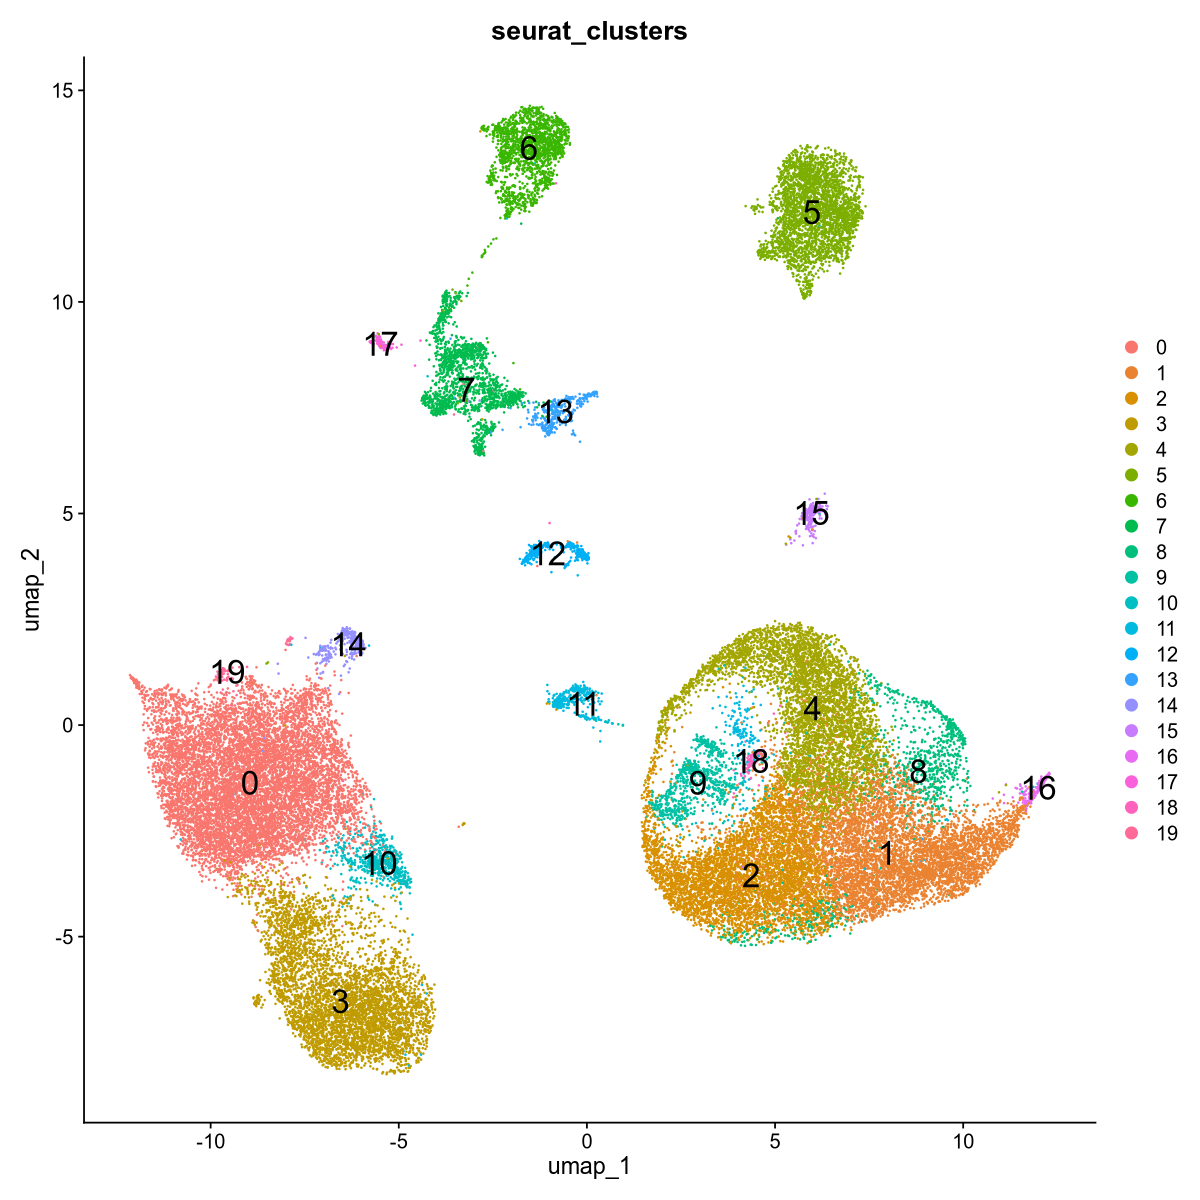

In [78]:
fig.size(10,10)
DimPlot(batches_harmony, reduction = "umap", 
        group.by = "seurat_clusters", pt.size = .1,label=TRUE,label.size=7)

In [74]:
Idents(batches_harmony) = "seurat_clusters"

In [75]:
annotations.df = openxlsx::read.xlsx(
    '../Figure5_20230830_No_6-50_Organoids_seurat_annotation_1.xlsx')

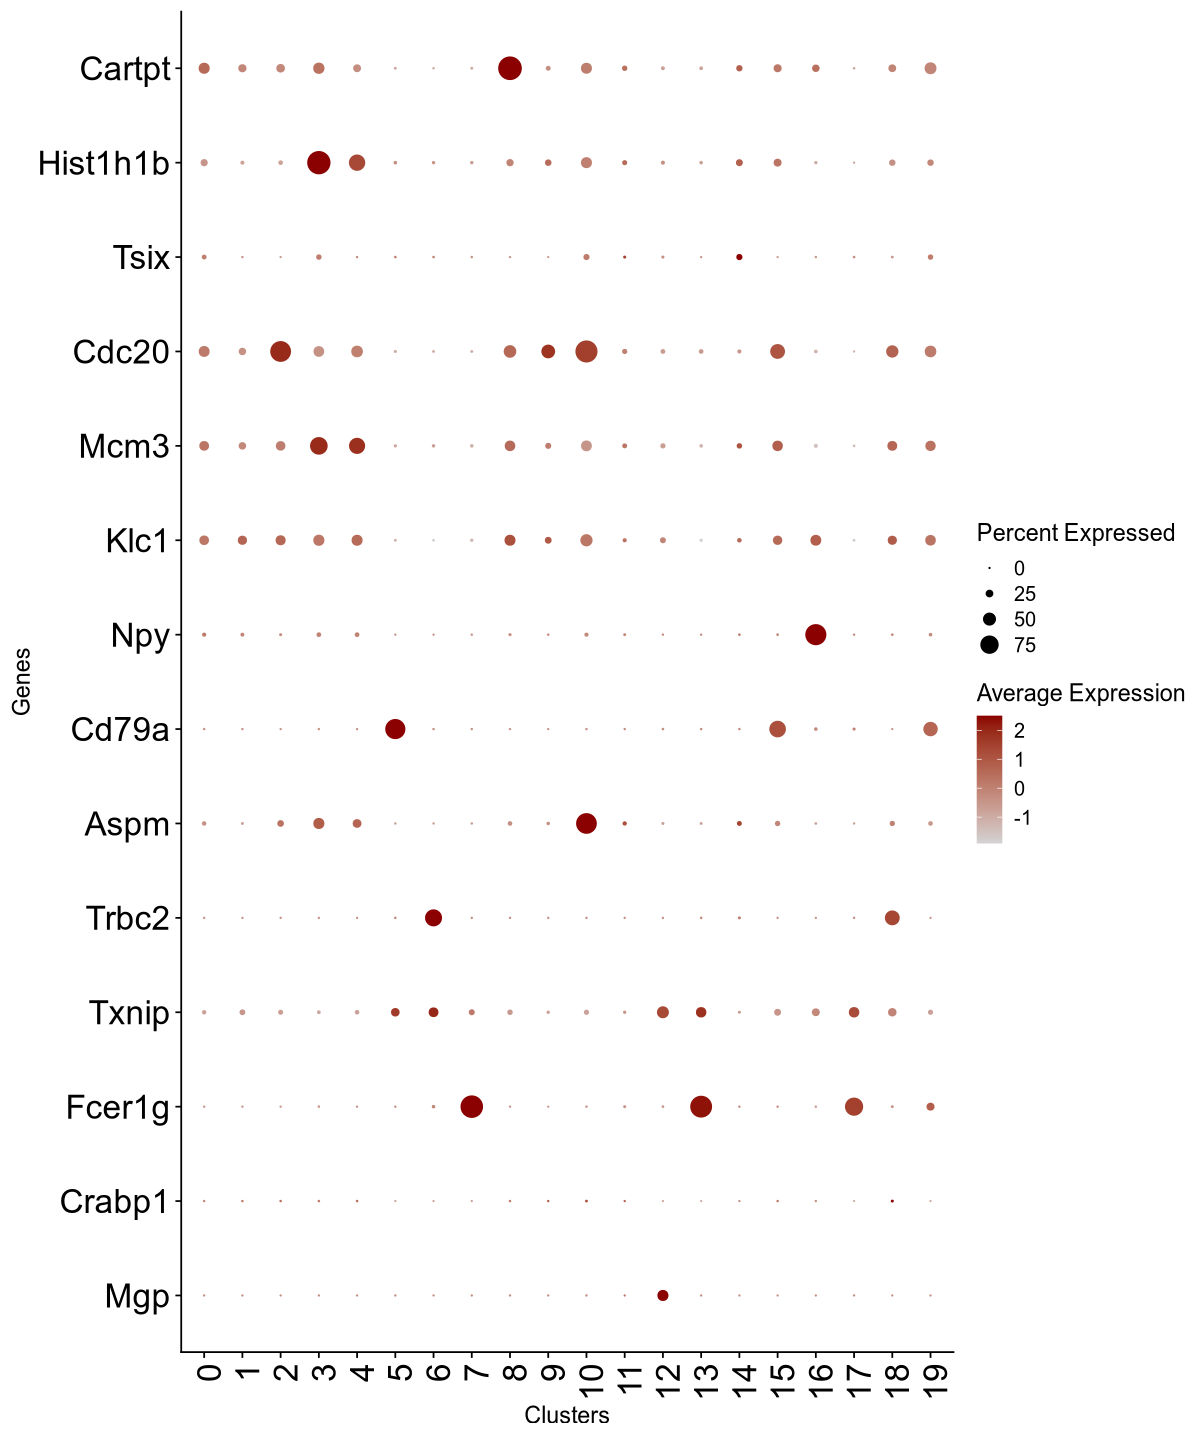

In [76]:
options(repr.plot.height=12, repr.plot.width=10, res=200)
pdot = DotPlot(
        batches_harmony, 
        assay='RNA',
        features = unique(annotations.df$Gene) %>% stringr::str_to_title() %>% rev,  
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(
        axis.text.x = element_text(size=20,angle = 90, hjust = 1,vjust = 0.7),
        axis.text.y = element_text(size=20)
       ) +
        xlab('Genes')+
        ylab('Clusters')
pdot

In [80]:
fig.size(10,10)
p = DimPlot(batches_harmony, reduction = "umap", 
        group.by = "seurat_clusters", pt.size = .1,label=TRUE,label.size=7)

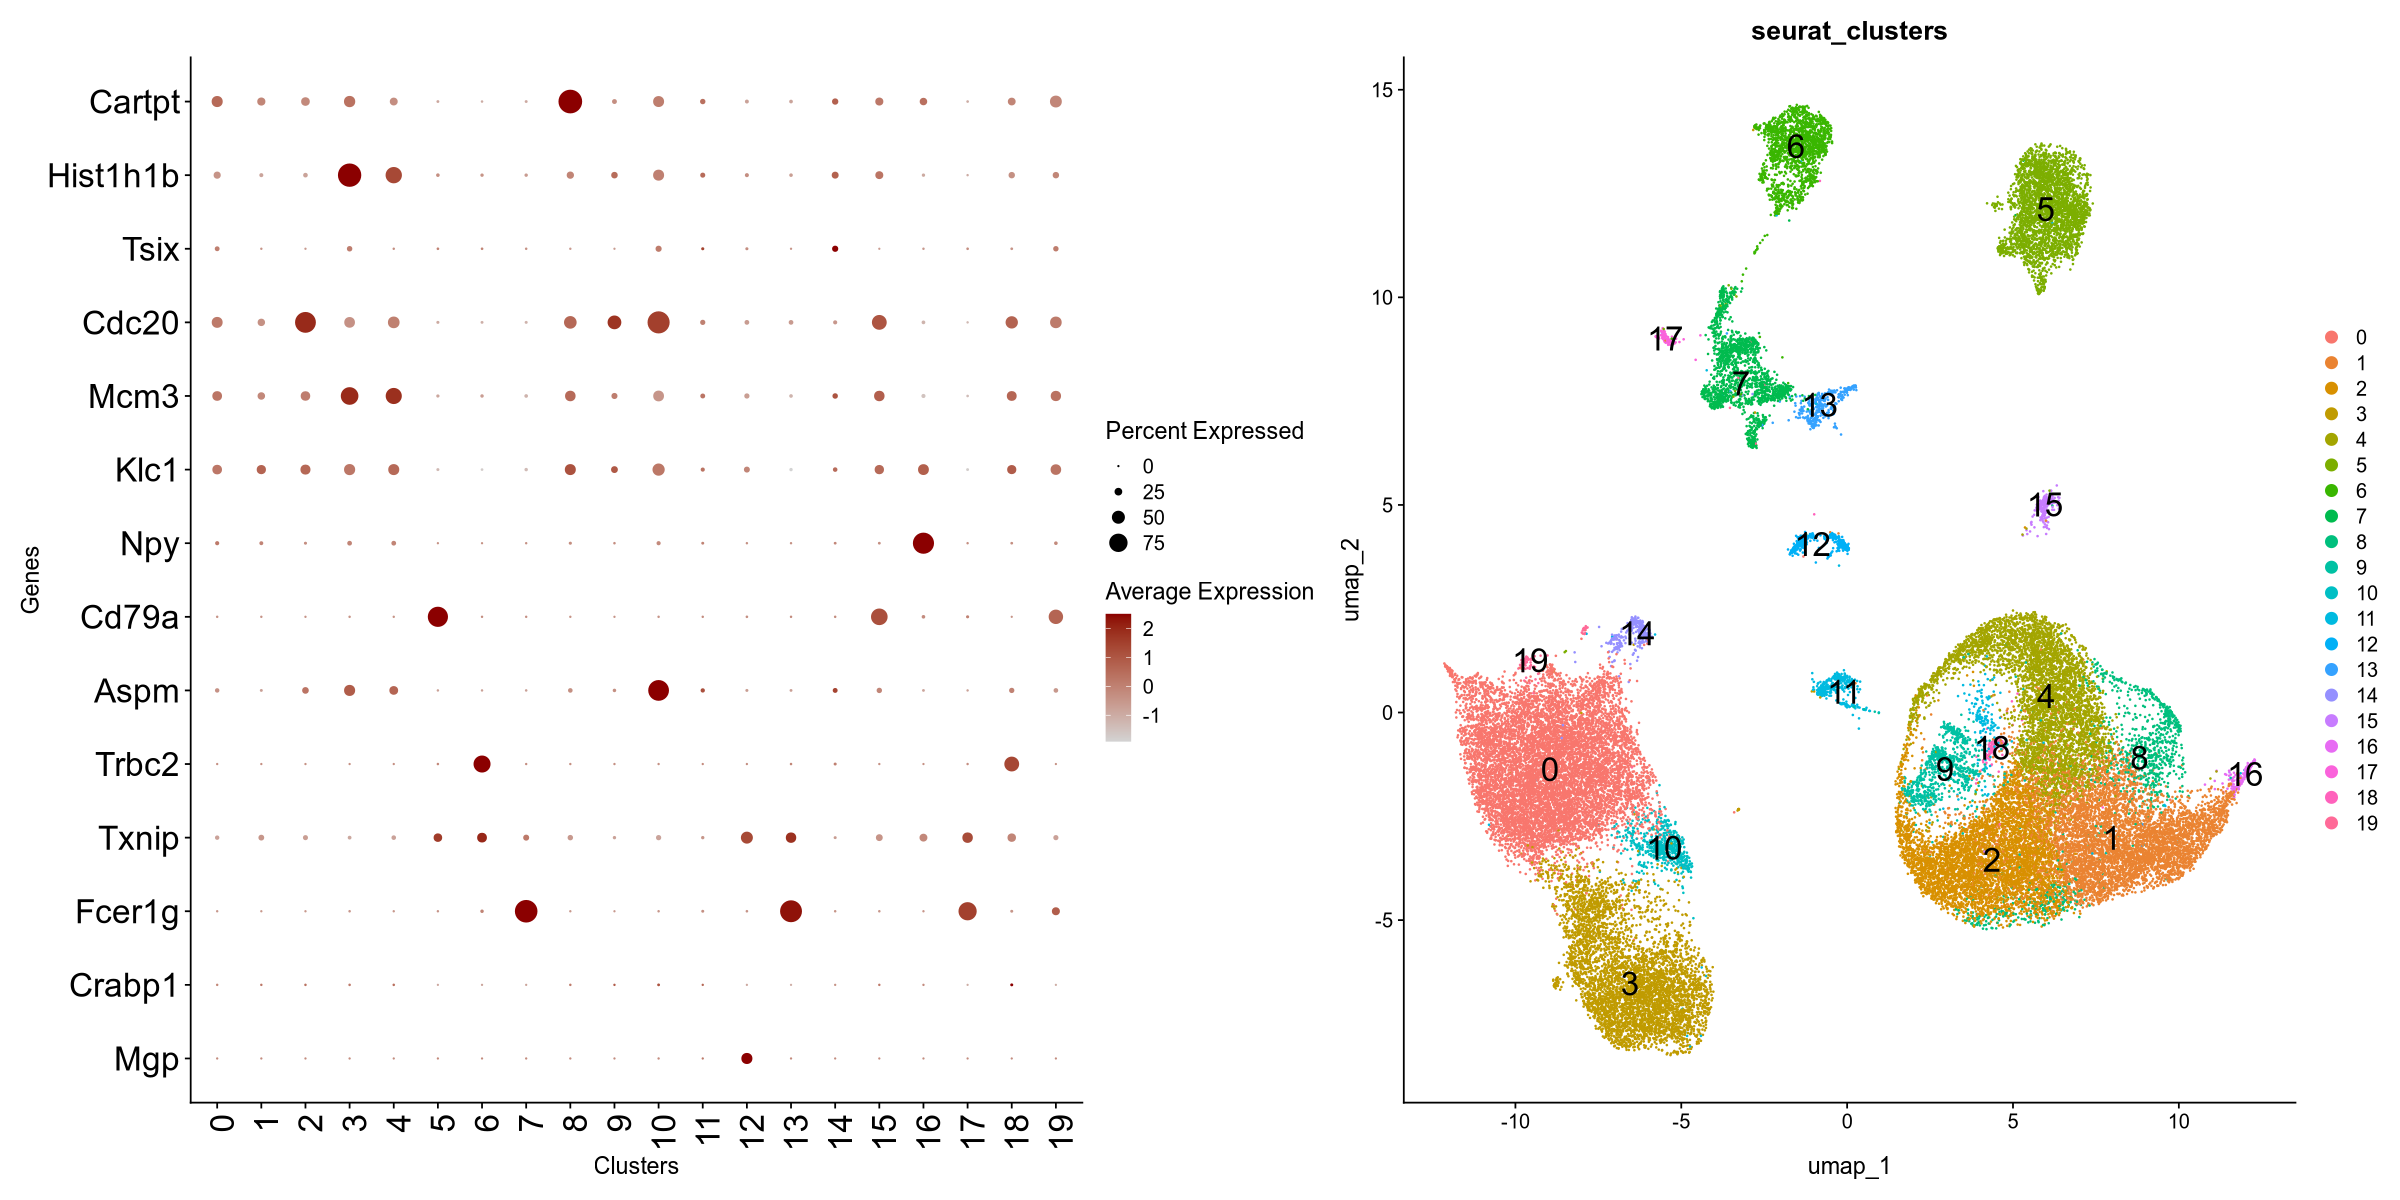

In [81]:
fig.size(10,20)
pdot | p

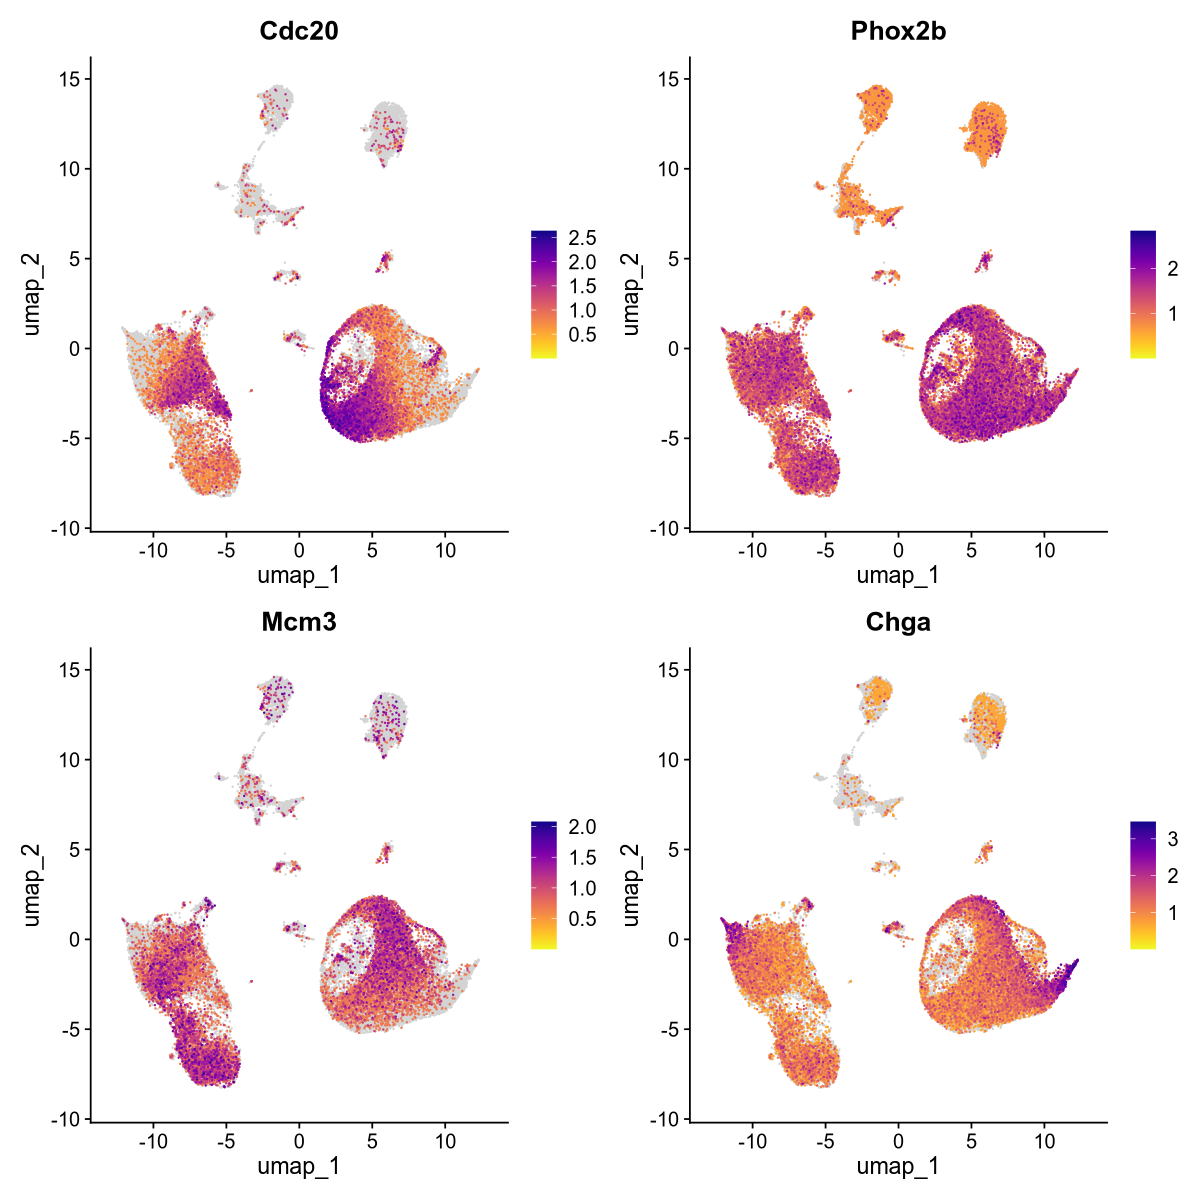

In [87]:
fig.size(10,10)
FeaturePlot_scCustom(batches_harmony, features = c('Cdc20', 'Phox2b','Mcm3', 'Chga'))